# Cournot Competition with and without Collusion


In this notebook, we work with two competing firms operating under Cournot competition known from Micro II, Micro III and Industrial Organization. First, we solve the simple standard model and afterwards we look into what happens when the model is extended so that the firms collude.

## Cournot Competition

When firms compete in quantities, we have Cournot competition. In this notebook we stick to the simplest setup with two firms, i.e. we have a duopoly. The two firms simultaneously decide their output, and since the two firms have market power, the chosen quantities will determine the price. Both firms seek to maximize their profit given the decision of the other firm. The Cournot model can be extended in different ways. In this notebook we will look into what happens when firms collude, meaning that the two firms agree on a specific strategy.

## The Standard Model

### General Assumptions

The two firms produce a homogeneous product, and thus the consumers see them as perfect substitutes.

The two firms have the same costs, which are $c(q)$, and the marginal costs are constant and equal to c, i.e. $mc = c$.

The two firms are facing the same overall demand from consumers.

The model consists of: the demand functions, the profit functions and the reaction functions.

### The Demand Function

Firm 1 produces and amount equal to $q_1$, whereas firm 2 produces $q_2$. The total demand in the economy is represented by the sum of each firm's individual supply, and is thus: 

$$Q = q_1+q_2$$

The inverse linear demand function is given by 

$$p = a - b(q_1+q_2)$$

where $a$ and $b$ are positive parameters.

### The Profit Function

The profit function is total revenue less total costs. The price is linear, and more of both goods decreases the price.

$$\pi_1=pq_1-cq_1$$

where $p$ is given above as the inverse demand function. 

If we plug in the expression for $p$, we can rewrite the profit function and get:

$$\pi_1=[a-b(q_1+q_2)]q_1-cq_1$$

As the two firms are symmetric, the profit for firm 2 will be equivalent.

Notice that the profit of firm one depends on the amount of goods company two produces.

### The Reaction Function

The reaction functions show how much each firm produces given the other firms output.

To find the reaction functions, we optimize the profit function for firm 1 with respect to the quantity $q_1$:

\begin{equation*}
\begin{aligned}
\frac{\partial \pi_1}{\partial q_1} = a -2bq_1-bq_2-c = 0
\end{aligned}
\end{equation*}

We solve for $q_1$ to get the reaction function of firm 1:

$$q_1(q_2)=\frac{1}{2}\left[\frac{(a-c)}{b}-q_2\right]$$

As the two firms are symmetric, firm 2's reaction function is equivalent.

Notice that the higher the quantity of firm 2, the lower the quantity of firm 1.

### Cournot-Nash Equilibrium

Solving the model gives us the Cournot-Nash equilibrium. Here, firm 1 produces the optimal amount of the good given what firm 2 produces and vice verca.

To find the Cournot-Nash Equilibrium, we consider the two **reaction functions**. We plug in $q_2$ in $q_1$ and solve for $q_1$:

$$q_1 = \frac{1}{2}\left[\frac{(a-c)}{b}-\left[\frac{1}{2}\left[\frac{(a-c)}{b}-q_1\right]\right]\right]$$
$$q_1=\frac{1}{3}\frac{(a-c)}{b}$$

As the two companies are symmetric, $q_2$ is:

$$q_2=\frac{1}{3}\frac{(a-c)}{b}$$

Which is the solution to the model. This gives us a price of:

$$p = a - b(\frac{1}{3}\frac{(a-c)}{b}+\frac{1}{3}\frac{(a-c)}{b}) = \frac{1}{3}a + \frac{2}{3}c$$

And a firm profit of:

$$\pi_i = pq_i-cq_i = \frac{(a + 2c)}{3}\frac{(a - c)}{3b} + c\frac{(a - c)}{3b} = \frac{a^2 + 4ac - 5c^2}{9b}$$

Now, we will solve the model using Python.

## Solving the Cournot model using Python

First, we import the relevant libraries. We will be be solving the model both symbolically and numerically, meaning that we need the sympy library and elements from the scipy library. Furthermore, we need numpy when working with arrays and matplotlib and ipywidgets for graphs.

In [192]:
# Import libraries
from scipy import optimize,arange
import numpy as np
import ipywidgets as widgets
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd

## Symbolically

First, we define all the symbols and make sure that the results will look nice when printed.

In [193]:
# Define symbols
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
pi1 = sm.symbols('pi1')
pi2 = sm.symbols('pi2')
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')

# For pretty printing
sm.init_printing(use_unicode=True)

Then we set up the inverse demand function.

In [194]:
def p(q1,q2):
    return a-b*(q1+q2)

Then we define the cost function.

In [195]:
def cost(q,c):
    if q == 0:
        cost = 0
    else:
        cost = c*q
    return cost

And finally, the profit function.

In [196]:
def profit(q1,q2,c):
    return p(q1,q2)*q1 - cost(c,q1)

Now can differentiate to find the reaction functions. We see that they are the same as found in the section above.

In [197]:
# Differentiate profit wrt q1 and q2, respectively
foc1 = sm.diff(profit(q1,q2,c),q1)
foc2 = sm.diff(profit(q2,q1,c),q2)
foc1

Finally, we can solve for the equilibrium output.

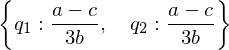

In [198]:
# Solve for equilibrium outpt
sm.solve([foc1, foc2], [q1, q2])

Which is the same as we found in the theoretical section above.

## Numerically

We again define all the functions, but this time as python variables, and since we are solving the model numerically now, we also define the demand parameters and the marginal costs.

In [199]:
def p(q1,q2):
    return a-b*(q1+q2)

def cost(q,c):
    if q == 0:
        cost = 0
    else:
        cost = c*q
    return cost

def profit(demand_function,cost_function,c,q1,q2):
    return demand_function(q1,q2)*q1-cost(q1,c)

a = 2
b = 1
c = 0

We then need to maximize profits in order to find the reaction function as shown in the theoretical section above. We will use scipy.optimize for this, and since this function is minimizing instead of maximizing, we add a minus in front.

In [200]:
def reaction_function(q2,c):
    q1 =  optimize.fminbound(lambda x: -profit(p,cost,c,x,q2),0,1,full_output=1)
    return q1[0]

def fixed_point(q,c):
    return [q[0]-reaction_function(q[1],c[0]),q[1]-reaction_function(q[0],c[1])]

initial_guess = [0,0]

solution = optimize.fsolve(lambda q: fixed_point(q,[0,0]), initial_guess)

print('Equilibrium output:',solution)

Equilibrium output: [0.66666667 0.66666667]


We see that in the Cournot-Nash equilibrium, we have that $q_1 = q_2 = 0.66666667$. We can depict the Cournot-Nash equilibrium graphically as well.

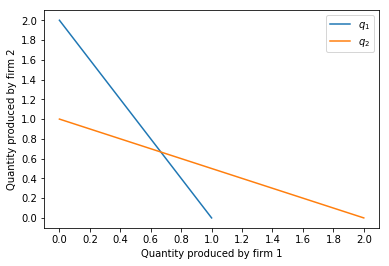

In [201]:
# Define reactions functions
def q1(q2,c,a,b):
    return 0.5*((a-c)/b-q2)

def q2(q1,c,a,b):
    return 0.5*((a-c)/b-q1)

# Create best response to multiple q values
range_q1 = np.linspace(0,2,10)
range_q2 = np.linspace(0,2,10)
q1 = q1(range_q2,c,a,b)
q2 = q2(range_q1,c,a,b)

# Plot q1 and q2
plt.plot(q1,range_q2, label = '$q_1$')
plt.plot(range_q1,q2, label = '$q_2$') #Notice here we have changed the x and y axis, to depict both graphs in the same diagram.
plt.xlabel('Quantity produced by firm 1')
plt.ylabel('Quantity produced by firm 2')
plt.xticks(np.arange(0, 2.1, step=0.2))
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.legend()

Let us calculate the Cournot-Nash equilibrium output, price and profit, in the case where $c=0$, $a=2$ and $b=1$.

In [202]:
q1_star = solution[0]
q2_star = solution[1]

Q_star = q1_star + q2_star

p_star = a-b*(q1_star+q2_star)

pi1_star = p_star*q1_star-c*q1_star
pi2_star = p_star*q2_star-c*q2_star

CS = Q_star*(a-p_star)/2

TS = pi1_star + pi2_star + CS

And now create a table that gives us an overview of the equilibrium values.

In [210]:
results = [{"Variable" : "$q_1^*$", "Value" : "%.2f" % q1_star},
           {"Variable" : "$q_2^*$", "Value" : "%.2f" % q2_star},
           {"Variable" : "$Q^*$", "Value" : "%.2f" % Q_star},
           {"Variable" : "$p^*$","Value" : "%.2f" % p_star},
           {"Variable" : "$\pi_1^*$", "Value" : "%.2f" % pi1_star},
           {"Variable" : "$\pi_2^*$", "Value" : "%.2f" % pi2_star},
           {"Variable" : "$CS$", "Value" : "%.2f" % CS},
           {"Variable" : "$TS$", "Value" : "%.2f" % TS}]

df = pd.DataFrame(results)

df.set_index('Variable')

df = df[['Variable', 'Value']]

df

,Variable,Value
0,$q_1^*$,0.67
1,$q_2^*$,0.67
2,$Q^*$,1.33
3,$p^*$,0.67
4,$\pi_1^*$,0.44
5,$\pi_2^*$,0.44
6,$CS$,0.89
7,$TS$,1.78


#### Interactive Graph
Now we will create the same graph with interactive parameters, hence a graph where it is possible to change the values of $c$, $a$ and $b$, within the general constraints.

In [204]:
# Import relevant packages to create interactive graphs
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

# Define the varibles to be interactive
def func(c,a,b):
    q1_interactive=0.5*((a-c)/b-q2) #Define q1
    plt.figure(figsize=(8,5))
    plt.plot(q2,q1_interactive,c='red')
    q2_interactive=(0.5*((a-c)/b-q1)) #Define q2
    plt.plot(q2_interactive,q1,c='yellow') #Notice we have changed the x and y axis compared to depicting q1
    plt.grid(True)
    plt.show()
    return (q1_interactive,q2_interactive)

# Create the interactive parameters
interactive_graph=interactive(func,a=(0.2,2.2,0.2),b=(0.2,2.2,0.2),
              c=(0,2,0.2))
display(interactive_graph)

interactive(children=(FloatSlider(value=1.0, description='c', max=2.0, step=0.2), FloatSlider(value=1.2, descr…

**Et eller andet sted, skal vi have defineret betingelserne for c, $0 \leq c<a$**

## Cournot Competition with Collusion

We will now look at the situation where the two firms collude on some amounts $q_1$ and $q_2$. Again, we assume symmetric firms.

When we have a duopoly with symmetric firms, the optimal to do collusion wise for the two firms is to maximize their joint profit, i.e. the industry profit. They can do this by maximizing the profit as if there was one monopoly firm and then split the market in two and act like a monopolist supplier in their own part of the market.

To understand find the equilibrium output in this situation, we first maximize industry profit using sympy.

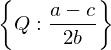

In [211]:
Q = sm.symbols('Q')
p = sm.symbols('p')
pi = sm.symbols('pi')

a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')

# For pretty printing
sm.init_printing(use_unicode=True)

def p(Q):
    return a-b*Q

def cost(Q,c):
    if Q == 0:
        cost = 0
    else:
        cost = c*Q
    return cost

def industry_profit(p,c,Q):
    return p(Q)*Q-cost(Q,c)

foc = sm.diff(industry_profit(p,c,Q),Q)

solve = sm.solve([foc], [Q])
solve

We now have the solution for the industry output. Since we have idenitical firms, they will split the amount in two. We now find that amount by turning the symbols into a python function and using the same parameters as earlier.

In [212]:
_monopoly_output = sm.lambdify((Q,a,b,c), solve, 'numpy')

def monopoly_output(Q,a,b,c):
    return _monopoly_output(Q,a,b,c)

a = 2
b = 1
c = 0

Q = monopoly_output(Q,a,b,c)
Q

The total output is thus 1, meaning that each firm produces $q_1 = q_2 = 0.5$.

We can now compute the rest of the equilibrium values.

In [213]:
for i in Q.values():
    float(i)
Q_M = i

q1_M = Q_M/2
q2_M = Q_M/2

p_M = a-b*Q_M

pi1_M = p_M*q1_M-c*q1_M
pi2_M = p_M*q2_M-c*q2_M

pi = p_M*Q_M - c*Q_M

CS_M = Q_M*(a-p_M)/2

TS_M = pi1_M + pi2_M + CS_M

In [214]:
results = [{"Variable" : "$q_1^*$", "Value" : "%.2f" % q1_star},
           {"Variable" : "$q_1^M$", "Value" : "%.2f" % q1_M},
           {"Variable" : "$q_2^*$", "Value" : "%.2f" % q2_star},
           {"Variable" : "$q_2^M$", "Value" : "%.2f" % q2_M},
           {"Variable" : "$Q^*$", "Value" : "%.2f" % Q_star},
           {"Variable" : "$Q^M$", "Value" : "%.2f" % Q_M},
           {"Variable" : "$p^*$","Value" : "%.2f" % p_star},
           {"Variable" : "$p^M$","Value" : "%.2f" % p_M},
           {"Variable" : "$\pi_1^*$", "Value" : "%.2f" % pi1_star},
           {"Variable" : "$\pi_1^M$", "Value" : "%.2f" % pi1_M},
           {"Variable" : "$\pi_2^*$", "Value" : "%.2f" % pi2_star},
           {"Variable" : "$\pi_2^M$", "Value" : "%.2f" % pi2_M},
           {"Variable" : "$CS$", "Value" : "%.2f" % CS},
           {"Variable" : "$CS^M$", "Value" : "%.2f" % CS_M},
           {"Variable" : "$TS$", "Value" : "%.2f" % TS},
           {"Variable" : "$TS^M$", "Value" : "%.2f" % TS_M}]

df = pd.DataFrame(results)

df.set_index('Variable')

df = df[['Variable', 'Value']]

df

,Variable,Value
0,$q_1^*$,0.67
1,$q_1^M$,0.50
2,$q_2^*$,0.67
3,$q_2^M$,0.50
4,$Q^*$,1.33
5,$Q^M$,1.00
6,$p^*$,0.67
7,$p^M$,1.00
8,$\pi_1^*$,0.44
9,$\pi_1^M$,0.50


### Monopoly Profit
We now from micro economics that under monopoly competition, $MR=MC=q^m$. We use this to determine the monopoly profit for the cournot model with collusion, we use that $q_1=q_2=q$:
$$R=p*Q$$
$$R=(a-b(Q))*Q$$
$$R=aQ-bQ^2$$
\begin{equation*}
\begin{aligned}
MR = \frac{\partial R}{\partial Q} = a-2bQ = c
\end{aligned}
\end{equation*}
$$Q^m=\frac{a-c}{2b}$$

By plugging this into $p$ we find the monopoly price:
$$p=a-b\left(\frac{a-c}{2b}\right)$$
$$p^m=\frac{a+c}{2}$$
Hence, the monopoly profit must be:
$$\pi^m=\frac{a-c}{2b}*\frac{a+c}{2}-\frac{a-c}{2b}c$$

For solution to sustain, $\pi^m$ must be higher than the profit for both firms without collusion. 

Let now see whether this holdes using Python.

We want to examine what happens with firm profits under collusion, i.e. we want to find $\pi(q,q) + \pi(q,q) = 2\pi(q,q)$. As we now they will produce the monopoly amount, we also now, the total profit will be equal to the monopoly profit when the two firms collude. Hence, for collusion to be sustainable, the following has to hold:

$$\frac{1}{1-\delta}\pi(q,q) \geq \underset{\hat{q}}{max} \pi(\hat{q},q) + \frac{\delta}{1-\delta}\pi(q^*,q^*)$$

The profit from colluding must be higher than the profit from not colluding, the monopoly profit. 

We rewrite this:

$$\pi(q,q) \geq (1-\delta)\underset{\hat{q}}{max} \pi(\hat{q},q) + \delta\pi(q^*,q^*)$$

$\delta$ is the discount factor and is between 0 and 1, while $\hat{q}$ is the best response when the other firm chooses $q$ and $q^*$ is the Cournot-Nash equilibrium output.